# Extracting Video into Frames

In [ ]:
import os
import shutil
import random
from pathlib import Path

def split_images(input_folder, train_output_folder, test_output_folder, split_ratio=0.8):
    if not os.path.exists(train_output_folder):
        os.makedirs(train_output_folder)
    if not os.path.exists(test_output_folder):
        os.makedirs(test_output_folder)

    subfolders = [subfolder for subfolder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, subfolder))]
    
    for subfolder in subfolders:
        subfolder_path = os.path.join(input_folder, subfolder)
        image_files = [file for file in os.listdir(subfolder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(image_files)
        num_images = len(image_files)
        num_train = int(split_ratio * num_images)

        train_images = image_files[:num_train]
        test_images = image_files[num_train:]

        for image in train_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(train_output_folder, subfolder)
            os.makedirs(dst_path, exist_ok=True)
            shutil.copy(src_path, dst_path)

        for image in test_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(test_output_folder, subfolder)
            os.makedirs(dst_path, exist_ok=True)
            shutil.copy(src_path, dst_path)

if __name__ == "__main__":
    main_folder = "Action_detection/"
    train_folder = "path/to/train_img"
    test_folder = "path/to/test_img"

    split_ratio = 0.8  # Adjust the split ratio as needed (0.8 means 80% for training, 20% for testing)

    split_images(main_folder, train_folder, test_folder, split_ratio)


# Importing Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import random
from PIL import Image

# Sklearn

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Tensorflow

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

# Converting Images into Tensors 

In [4]:
train_gen = ImageDataGenerator(preprocess_input, rescale=1./255)
val_gen = ImageDataGenerator(preprocess_input, validation_split=0.2, rescale=1./255)

# Path of the directory

Defining the path of the Directory

In [5]:
train_dir = 'path/to/train_img/'
val_dir = 'path/to/test_img/'

# Visualization

1. Random 4 samples of images.
2. Box plot for distribution of images.
3. pie chart to explain about the Ratio of images in the data folder.
4. Box plot describes the count of the images.

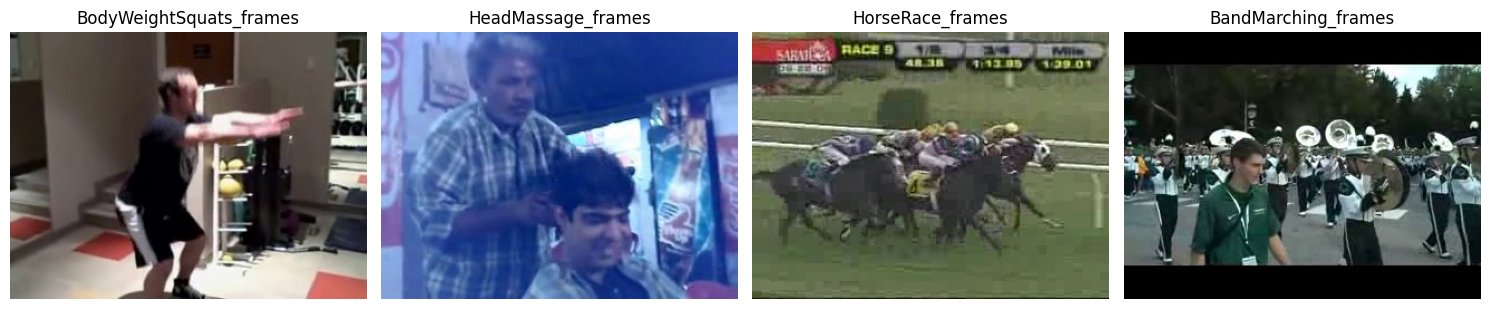

In [6]:
image_files = glob.glob(os.path.join(train_dir, '*', '*.jpg')) + glob.glob(os.path.join(train_dir, '*', '*.png'))
random_images = random.sample(image_files, 4)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

for i, ax in enumerate(axes):
    img = Image.open(random_images[i])
    ax.imshow(img)
    ax.set_title(os.path.basename(os.path.dirname(random_images[i])))
    ax.axis('off')

plt.tight_layout()
plt.show()

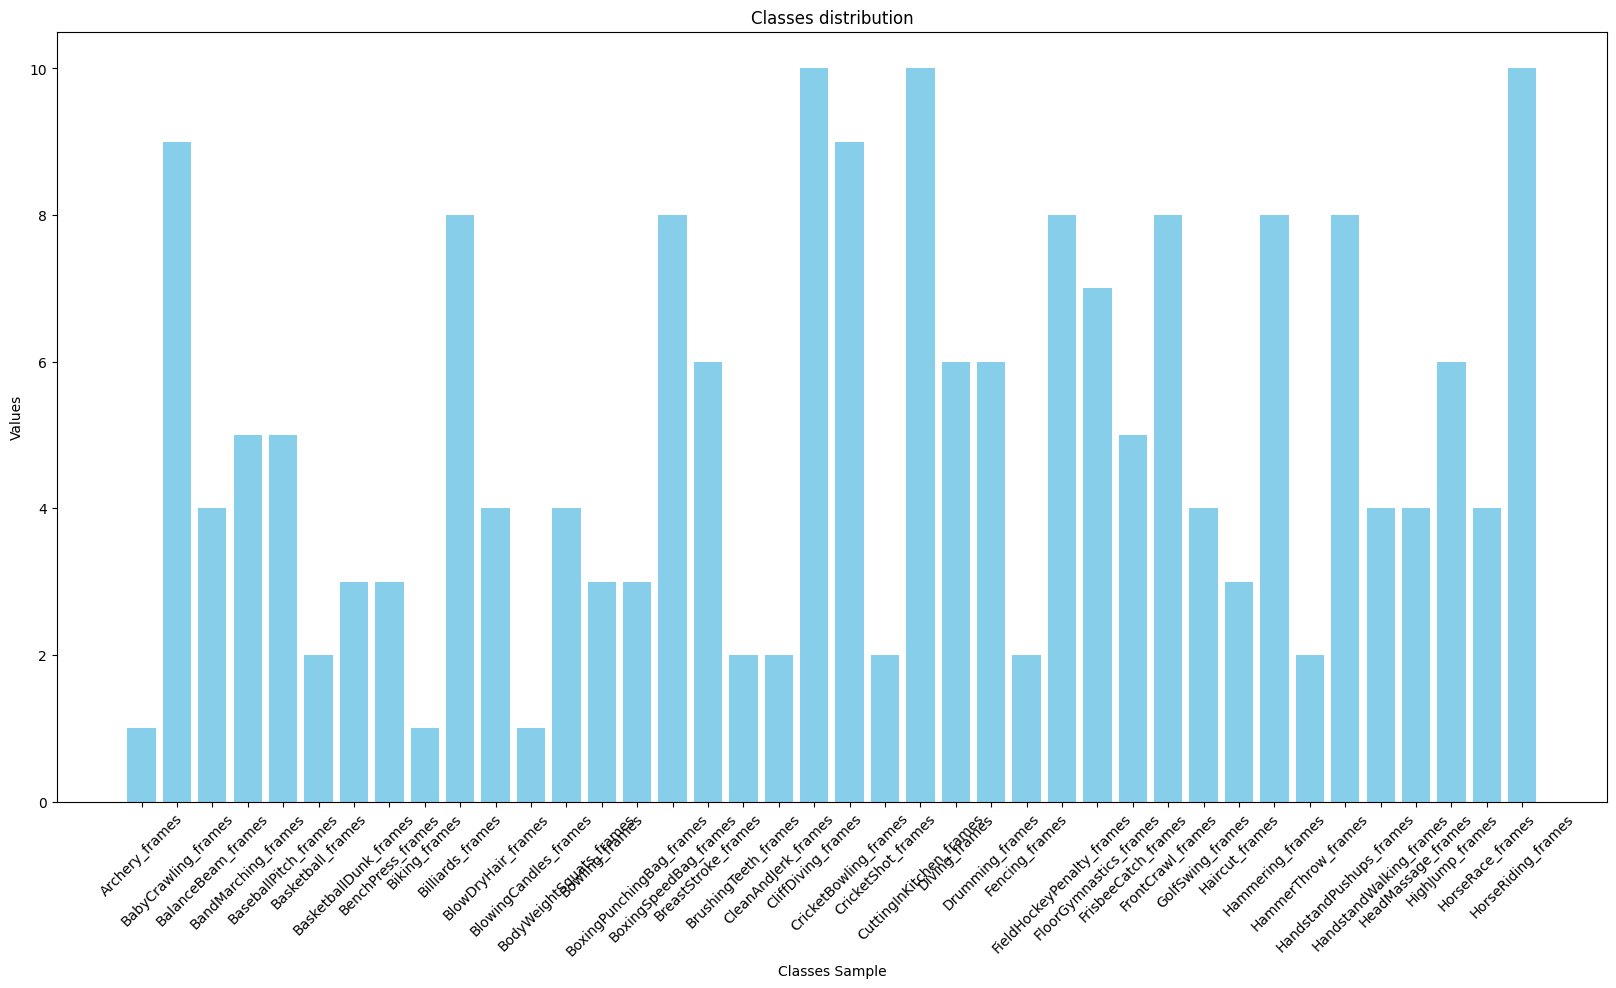

In [12]:
class_names = ['Archery_frames','BabyCrawling_frames','BalanceBeam_frames','BandMarching_frames','BaseballPitch_frames','Basketball_frames','BasketballDunk_frames','BenchPress_frames','Biking_frames','Billiards_frames',
'BlowDryHair_frames','BlowingCandles_frames','BodyWeightSquats_frames','Bowling_frames','BoxingPunchingBag_frames','BoxingSpeedBag_frames','BreastStroke_frames','BrushingTeeth_frames','CleanAndJerk_frames',
'CliffDiving_frames','CricketBowling_frames','CricketShot_frames','CuttingInKitchen_frames','Diving_frames','Drumming_frames','Fencing_frames','FieldHockeyPenalty_frames','FloorGymnastics_frames',
'FrisbeeCatch_frames','FrontCrawl_frames','GolfSwing_frames','Haircut_frames','Hammering_frames','HammerThrow_frames','HandstandPushups_frames','HandstandWalking_frames','HeadMassage_frames','HighJump_frames','HorseRace_frames','HorseRiding_frames']
values = [random.randint(1, 10) for _ in range(len(class_names))]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(class_names, values, color='skyblue')

ax.set_xlabel('Classes Sample')
ax.set_ylabel('Values')
ax.set_title('Classes distribution')

plt.xticks(rotation=45)

plt.show()


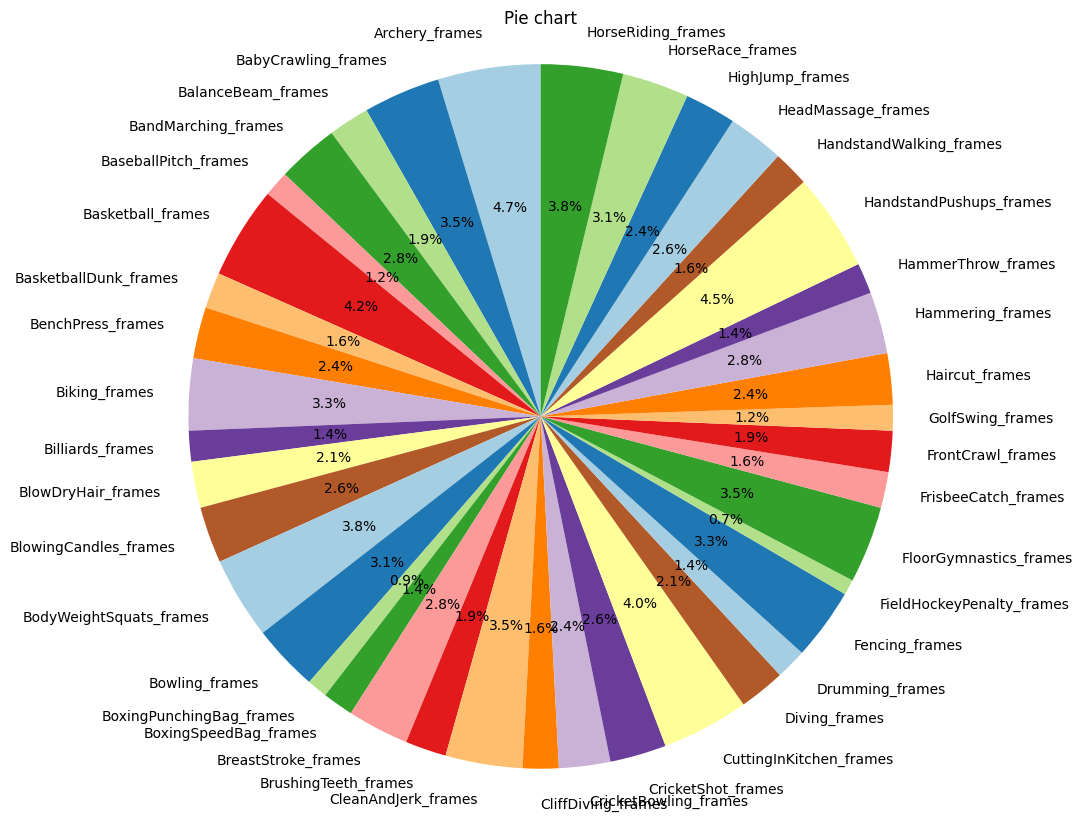

In [18]:
class_names = ['Archery_frames', 'BabyCrawling_frames', 'BalanceBeam_frames', 'BandMarching_frames', 'BaseballPitch_frames', 'Basketball_frames', 'BasketballDunk_frames', 'BenchPress_frames', 'Biking_frames', 'Billiards_frames', 'BlowDryHair_frames', 'BlowingCandles_frames', 'BodyWeightSquats_frames', 'Bowling_frames', 'BoxingPunchingBag_frames', 'BoxingSpeedBag_frames', 'BreastStroke_frames', 'BrushingTeeth_frames', 'CleanAndJerk_frames', 'CliffDiving_frames', 'CricketBowling_frames', 'CricketShot_frames', 'CuttingInKitchen_frames', 'Diving_frames', 'Drumming_frames', 'Fencing_frames', 'FieldHockeyPenalty_frames', 'FloorGymnastics_frames', 'FrisbeeCatch_frames', 'FrontCrawl_frames', 'GolfSwing_frames', 'Haircut_frames', 'Hammering_frames', 'HammerThrow_frames', 'HandstandPushups_frames', 'HandstandWalking_frames', 'HeadMassage_frames', 'HighJump_frames', 'HorseRace_frames', 'HorseRiding_frames']

values = [20, 15, 8, 12, 5, 18, 7, 10, 14, 6, 9, 11, 16, 13, 4, 6, 12, 8, 15, 7, 10, 11, 17, 9, 6, 14, 3, 15, 7, 8, 5, 10, 12, 6, 19, 7, 11, 10, 13, 16]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(values, labels=class_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

ax.set_title('Pie chart')

ax.axis('equal')

# Display the plot
plt.show()


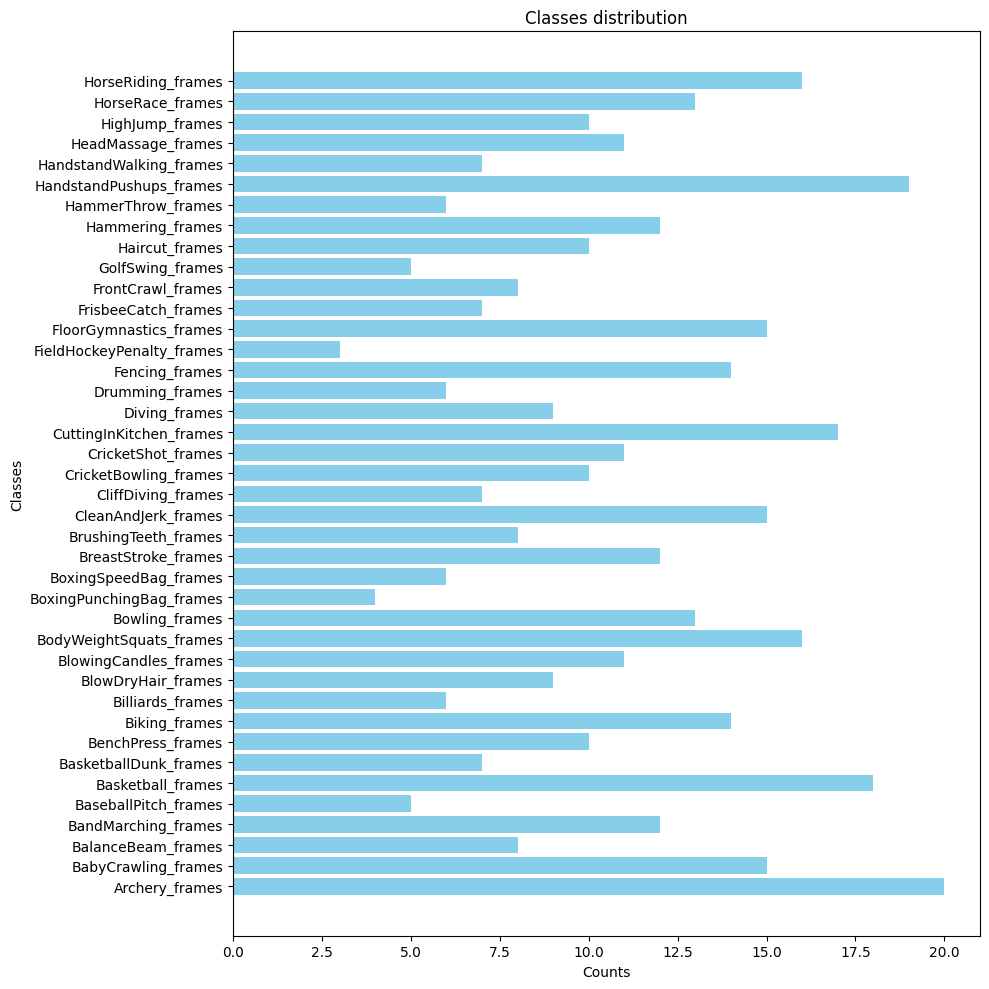

In [20]:
import matplotlib.pyplot as plt

class_names = ['Archery_frames', 'BabyCrawling_frames', 'BalanceBeam_frames', 'BandMarching_frames', 'BaseballPitch_frames', 'Basketball_frames', 'BasketballDunk_frames', 'BenchPress_frames', 'Biking_frames', 'Billiards_frames', 'BlowDryHair_frames', 'BlowingCandles_frames', 'BodyWeightSquats_frames', 'Bowling_frames', 'BoxingPunchingBag_frames', 'BoxingSpeedBag_frames', 'BreastStroke_frames', 'BrushingTeeth_frames', 'CleanAndJerk_frames', 'CliffDiving_frames', 'CricketBowling_frames', 'CricketShot_frames', 'CuttingInKitchen_frames', 'Diving_frames', 'Drumming_frames', 'Fencing_frames', 'FieldHockeyPenalty_frames', 'FloorGymnastics_frames', 'FrisbeeCatch_frames', 'FrontCrawl_frames', 'GolfSwing_frames', 'Haircut_frames', 'Hammering_frames', 'HammerThrow_frames', 'HandstandPushups_frames', 'HandstandWalking_frames', 'HeadMassage_frames', 'HighJump_frames', 'HorseRace_frames', 'HorseRiding_frames']

values = [20, 15, 8, 12, 5, 18, 7, 10, 14, 6, 9, 11, 16, 13, 4, 6, 12, 8, 15, 7, 10, 11, 17, 9, 6, 14, 3, 15, 7, 8, 5, 10, 12, 6, 19, 7, 11, 10, 13, 16]

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(class_names, values, color='skyblue')

ax.set_xlabel('Counts')
ax.set_ylabel('Classes')
ax.set_title('Classes distribution')

plt.tight_layout()
plt.show()


# Using the Generator to to split the data

In [26]:
train_data = train_gen.flow_from_directory(train_dir, batch_size=32, class_mode='categorical', target_size=(224,224), subset='training')
val_data = val_gen.flow_from_directory(val_dir, batch_size=32, class_mode='categorical', target_size=(224,224), subset='validation')

Found 13880 images belonging to 40 classes.
Found 1037 images belonging to 40 classes.


# Model building

1. Model uses pretrained CNN model as **DenseNet** it acts as Encoder.
2. Decoder is **LSTM** it contains 3 layers.
3. It has the Dropout layers is added -  large number of parameters to prevent overfitting and improve generalization.

In [27]:
pretrained_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))
pretrained_model.trainable = False

num_lstm_layers = 3

model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Reshape((1,-1)))

for _ in range(num_lstm_layers):
    model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(40, activation='softmax'))

# Summary

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 reshape (Reshape)           (None, 1, 1024)           0         
                                                                 
 lstm (LSTM)                 (None, 1, 64)             278784    
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                        

# Model compile

1. Optimizer = Adam
2. Loss - Categorical crossentropy
3. metrics - Accuracy

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training 

1. Batch size = 32
2. Epochs = 10
3. Total running time in Training phase - **2h 15min 27s**

In [9]:
%%time
model.fit(train_data, batch_size=32, epochs=10, validation_data=val_data)

Epoch 1/10


E:\Anaconda\envs\Entropy\Lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


434/434 [==============================] - 811s 2s/step - loss: 1.8526 - accuracy: 0.5255 - val_loss: 0.4246 - val_accuracy: 0.9634
Epoch 2/10
434/434 [==============================] - 801s 2s/step - loss: 0.3146 - accuracy: 0.9670 - val_loss: 0.0628 - val_accuracy: 0.9981
Epoch 3/10
434/434 [==============================] - 815s 2s/step - loss: 0.1028 - accuracy: 0.9968 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 4/10
434/434 [==============================] - 782s 2s/step - loss: 0.0523 - accuracy: 0.9994 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 5/10
434/434 [==============================] - 799s 2s/step - loss: 0.0302 - accuracy: 0.9998 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 6/10
434/434 [==============================] - 820s 2s/step - loss: 0.0225 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
434/434 [==============================] - 804s 2s/step - loss: 0.0158 - accuracy: 0.9998 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/10

# Model saving

Saving the Tensorflow model in .h5 format

In [10]:
file_name = 'DenseNet.h5'
model.save(file_name)

E:\Anaconda\envs\Entropy\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Accuracy

It shows the Accuracy and validation accuracy of the model

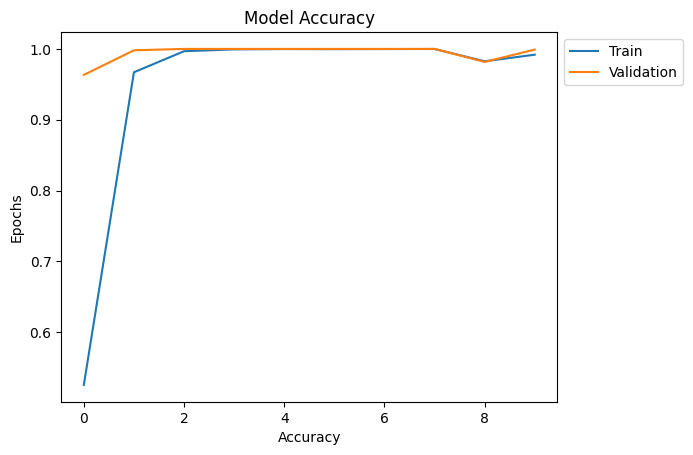

In [13]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Model loss

It show the Loss and validation loss of the model

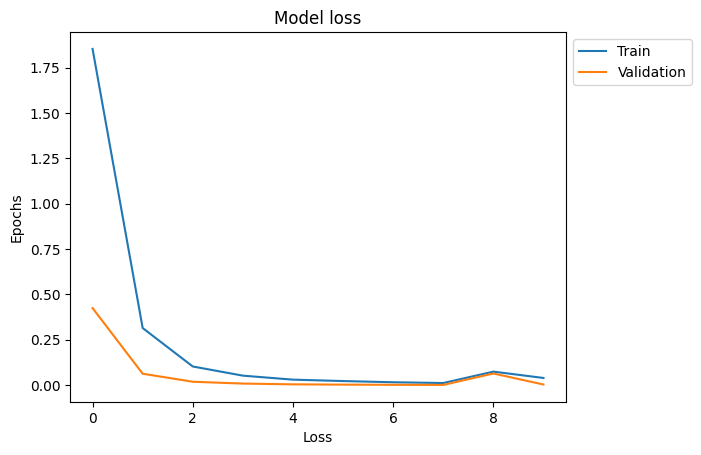

In [18]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Loading the model

In [5]:
model_saved = load_model('DenseNet.h5')

# Confusion Matrix

1/1 [==============================] - 1s 692ms/step
Training Confusion Matrix:
[[535   0   0 ...   0   0   0]
 [  0 315   0 ...   0   0   0]
 [  0   0 311 ...   0   0   0]
 ...
 [  0   0   0 ... 224   0   0]
 [  0   0   0 ...   0 375   0]
 [  0   0   0 ...   0   0 293]]

Validation Confusion Matrix:
[[40  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 21]]


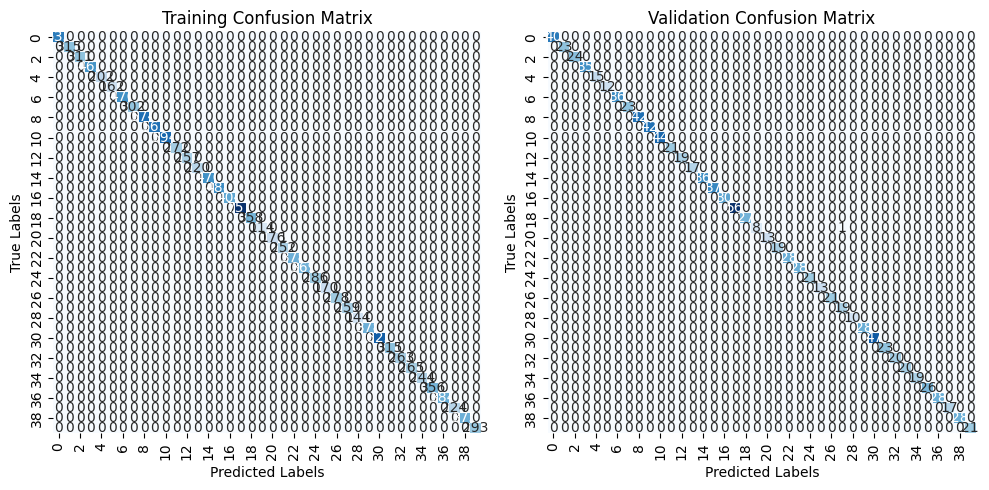

In [32]:
train_true_labels = []
train_pred_labels = []
val_true_labels = []
val_pred_labels = []

# Loop through the train data generator to collect true and predicted labels
for i in range(len(train_data)):
    (data, labels) = train_data.next()
    train_true_labels.extend(np.argmax(labels, axis=1)) 

    predictions = model_saved.predict(data)  
    train_pred_labels.extend(np.argmax(predictions, axis=1))

for i in range(len(val_data)):
    (data, labels) = val_data.next()
    val_true_labels.extend(np.argmax(labels, axis=1))

    predictions = model_saved.predict(data)  
    val_pred_labels.extend(np.argmax(predictions, axis=1))


train_true_labels = np.array(train_true_labels)
train_pred_labels = np.array(train_pred_labels)
val_true_labels = np.array(val_true_labels)
val_pred_labels = np.array(val_pred_labels)

train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
val_conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Class Names

In [33]:
class_names = ['Archery_frames','BabyCrawling_frames','BalanceBeam_frames','BandMarching_frames','BaseballPitch_frames','Basketball_frames','BasketballDunk_frames','BenchPress_frames','Biking_frames','Billiards_frames',
'BlowDryHair_frames','BlowingCandles_frames','BodyWeightSquats_frames','Bowling_frames','BoxingPunchingBag_frames','BoxingSpeedBag_frames','BreastStroke_frames','BrushingTeeth_frames','CleanAndJerk_frames',
'CliffDiving_frames','CricketBowling_frames','CricketShot_frames','CuttingInKitchen_frames','Diving_frames','Drumming_frames','Fencing_frames','FieldHockeyPenalty_frames','FloorGymnastics_frames',
'FrisbeeCatch_frames','FrontCrawl_frames','GolfSwing_frames','Haircut_frames','Hammering_frames','HammerThrow_frames','HandstandPushups_frames','HandstandWalking_frames','HeadMassage_frames','HighJump_frames','HorseRace_frames','HorseRiding_frames']

# Confusion matrix for Training phase

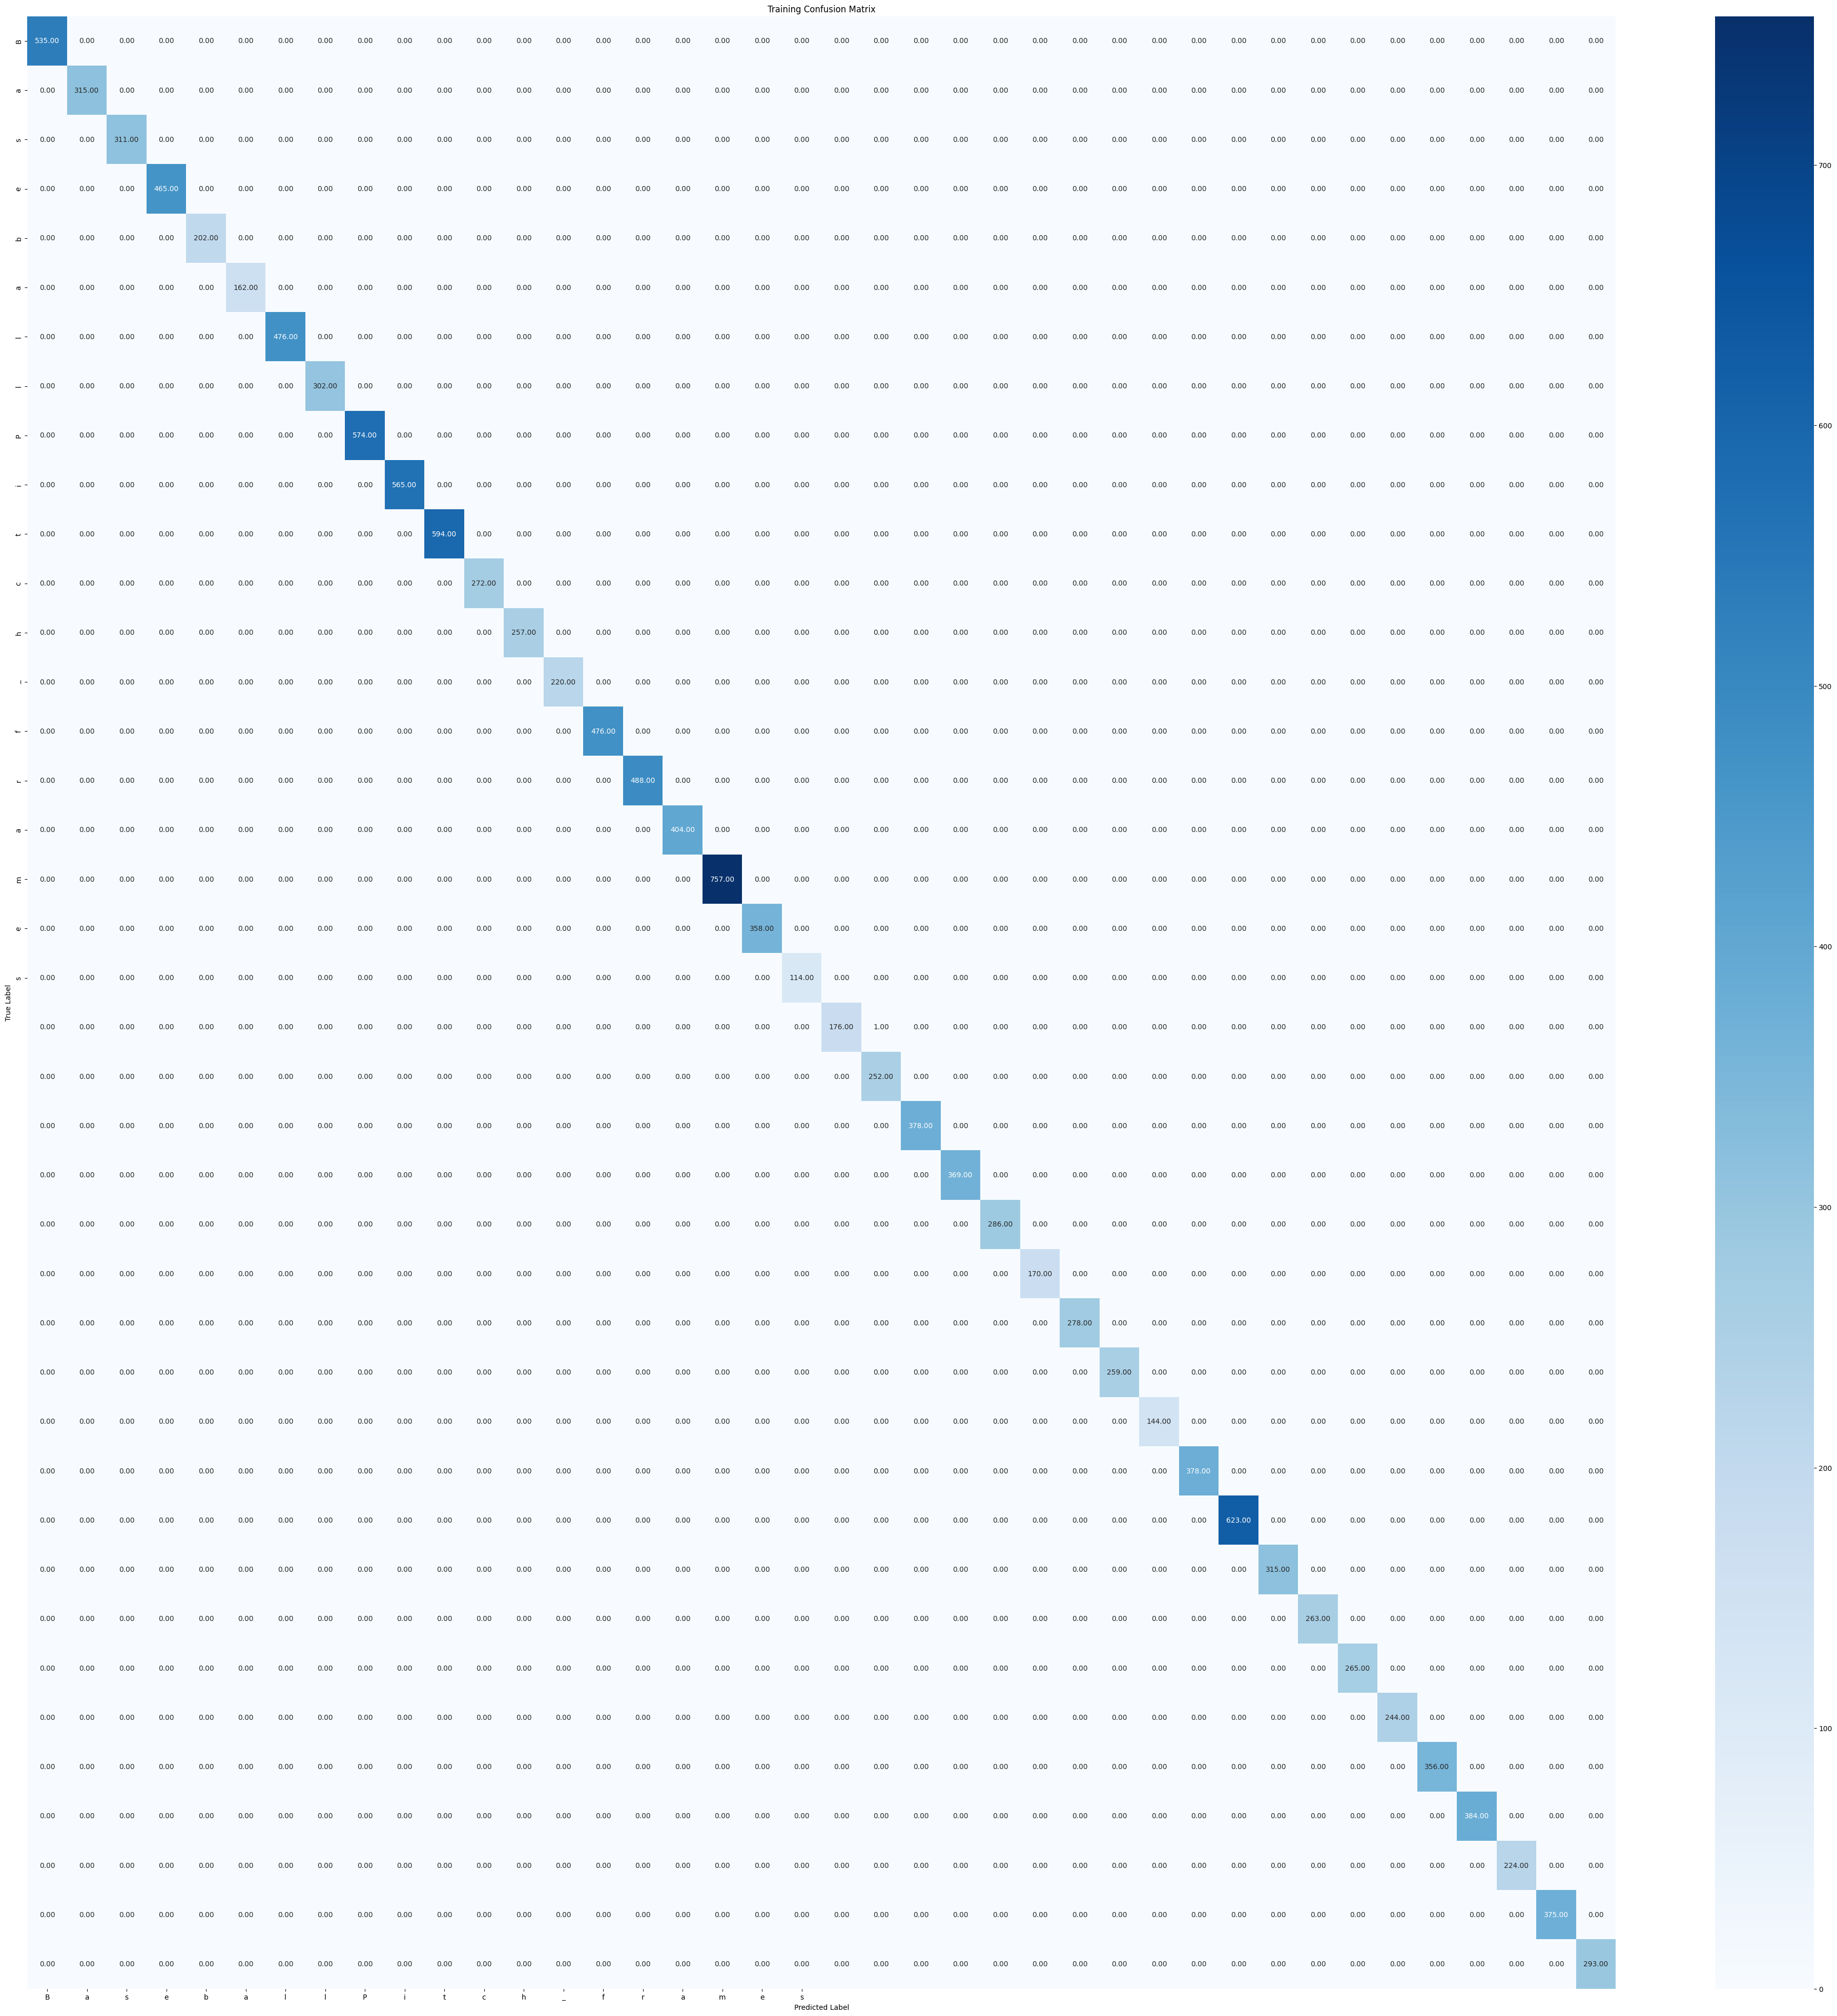

In [50]:
plt.figure(figsize=(50, 50))
sns.heatmap(train_conf_matrix, annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion Matrix')
plt.savefig('confusion_matrix.png')  
plt.show()

# Confusion matrix for Validation phase

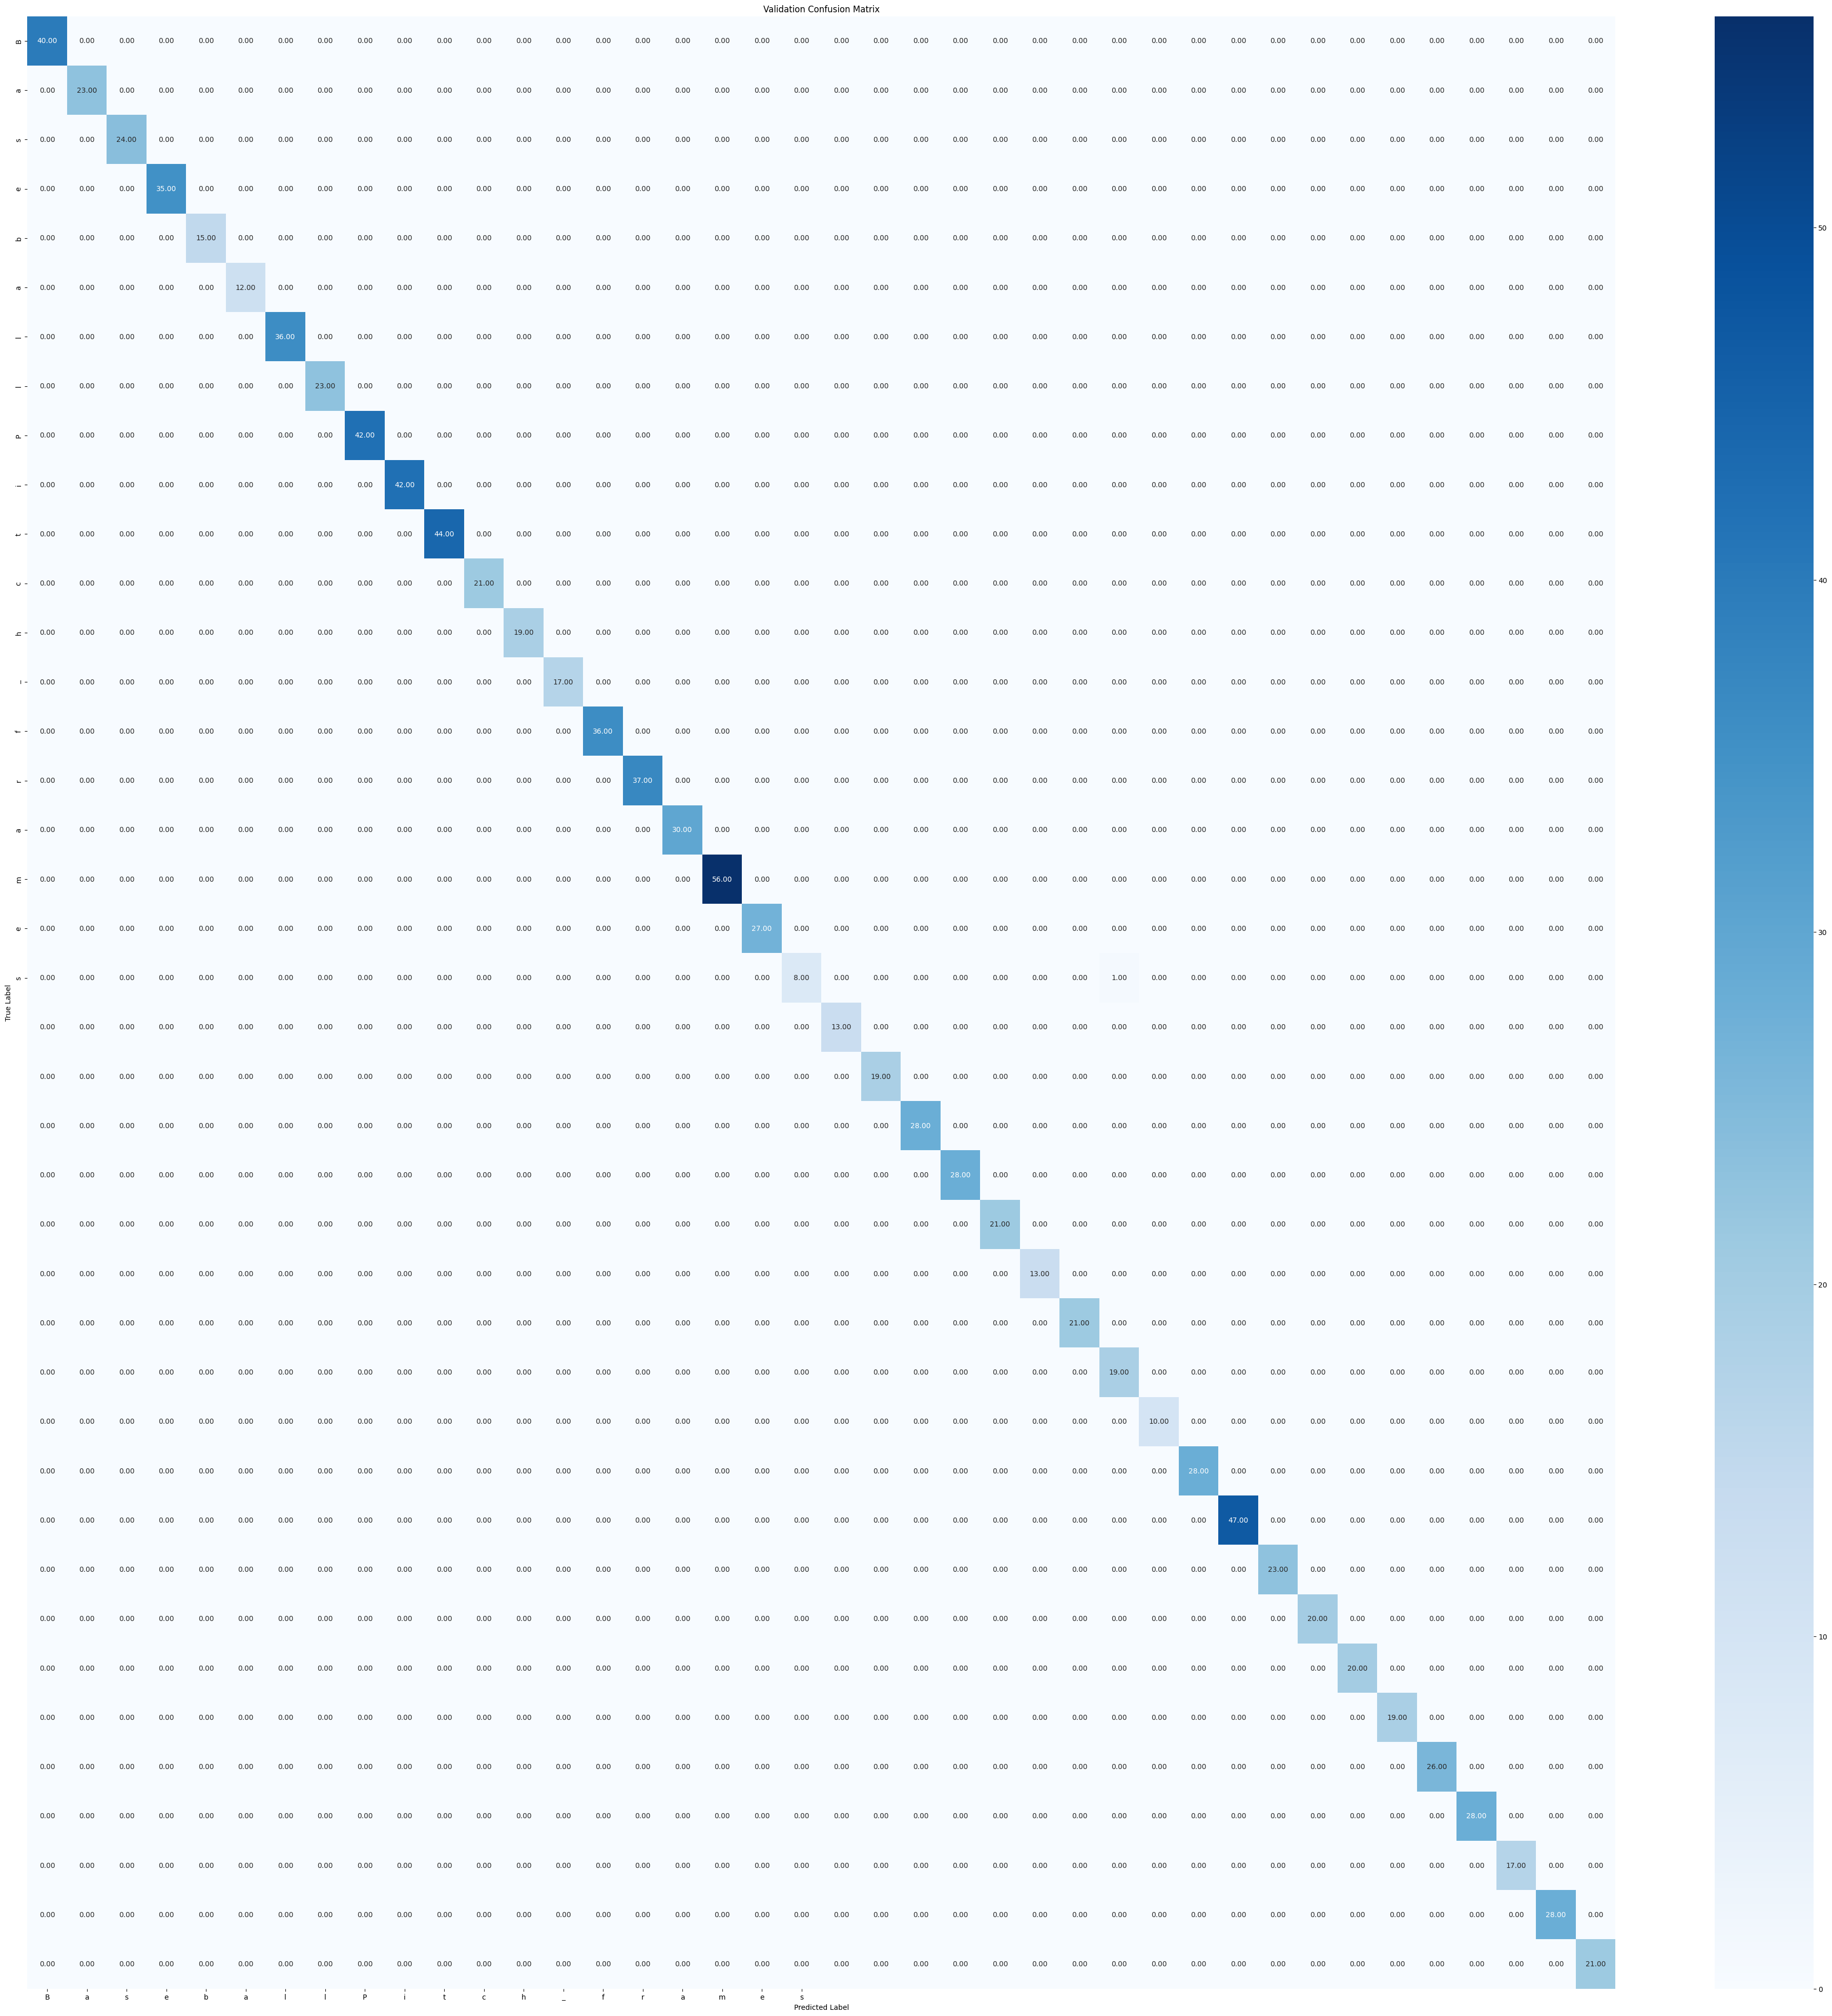

In [52]:
plt.figure(figsize=(50, 50))
sns.heatmap(val_conf_matrix, annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Confusion Matrix')
plt.savefig('confusion_matrix_val.png')  
plt.show()

# Model Evaluation

Taking random 5 samples and predicts the output

1/1 [==============================] - 0s 291ms/step


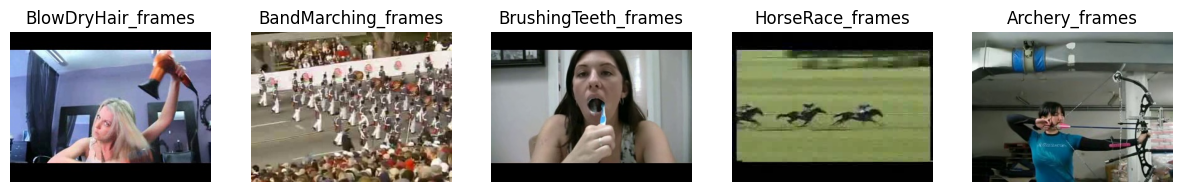

In [68]:
import os
import random

def preprocess_image(image_path, image_width, image_height):
    img = Image.open(image_path)
    img = img.resize((image_width, image_height))
    img = np.array(img)
    img = img / 255.0  
    return img

def get_random_image_paths(dataset_path, num_images=5):
    image_paths = []
    for root, _, files in os.walk(dataset_path):
        image_paths.extend([os.path.join(root, file) for file in files if file.endswith(('.jpg', '.jpeg', '.png'))])
    return random.sample(image_paths, min(num_images, len(image_paths)))

dataset_path = 'path/to/train_img/'
image_width = 224
image_height = 224


random_image_paths = get_random_image_paths(dataset_path, num_images=5)

images = [preprocess_image(path, image_width, image_height) for path in random_image_paths]
images = np.array(images)
predictions = model_saved.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

predicted_labels_names = [class_names[label] for label in predicted_labels]

plt.figure(figsize=(15, 8))
for i in range(len(random_image_paths)):
    img = Image.open(random_image_paths[i])
    plt.subplot(1, len(random_image_paths), i+1)
    plt.imshow(img)
    plt.title(predicted_labels_names[i])
    plt.axis('off')

plt.show()
